<a href="https://colab.research.google.com/github/botingchen/ML_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis
import json
import csv
api_key = "c9d26a6782e25df032d62899e2bbe7ef"
# https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key=<<api_key>>&language=en-US
# https://api.themoviedb.org/3/discover/movie?api_key=###&primary_release_date.gte=2006-01-01&primary_release_date.lte=2006-12-31
dataset = []
for year in range(2016,2022):
  for page_num in range(1,51):
    response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=c9d26a6782e25df032d62899e2bbe7ef&year='+ str(year) + '&page=' + str(page_num))
    dataset.append(response.json())
# response = requests.get('https://api.themoviedb.org/3/movie/335797/credits?api_key=c9d26a6782e25df032d62899e2bbe7ef&language=en-US')

In [ ]:
# highest_revenue = []
# highest_revenue.append(response_2016_2.json())
# # print(highest_revenue['page'])
#   # print(i)
# for column in highest_revenue:
#   for i in column['results']:
#     print(i)
# # print(highest_revenue)
id = []
original_title = []
genre_ids = []
original_language =[]
popularity = []
release_date = []
for i in range(0,300):
  for data in dataset[i]['results']:
    id.append(data['id'])
    original_title.append(data['original_title'])
    genre_ids.append(data['genre_ids'])
    original_language.append(data['original_language'])
    popularity.append(data['popularity'])
    release_date.append(data['release_date'])
# print(dataset[299])

In [ ]:
df = pd.DataFrame(list(zip(id, original_title, genre_ids, original_language, popularity, release_date)),columns =['TMDB_id', 'original_title', 'genre_ids', 'original_language', 'popularity', 'release_date'])
temp_1 = []
### get cast ###
for index in df['TMDB_id']:
  response = requests.get('https://api.themoviedb.org/3/movie/' + str(index) + '/credits?api_key=c9d26a6782e25df032d62899e2bbe7ef&language=en-US')
  temp_1.append(response.json())

In [ ]:
cast_name = [None] * 6000
cast_id = [None] * 6000
cast_popularity = [None] * 6000
for iter in range(0,6000):
  count = 0
  cn = []
  ci = []
  cp = []
  for cast in temp_1[iter]['cast']:
    count += 1
    if count == 6:
      continue
    cn.append(cast['original_name'])
    ci.append(cast['id'])
    cp.append(cast['popularity'])
  cast_name[iter] = cn
  cast_id[iter] = ci
  cast_popularity[iter] = cp    
df['cast_name'] = cast_name
df['cast_id'] = cast_id
df['cast_popularity'] = cast_popularity


,TMDB_id,original_title,genre_ids,original_language,popularity,release_date,cast_name,cast_id,cast_popularity
0,102382,The Amazing Spider-Man 2,"[28, 12, 14]",en,1069.261,2014-04-16,"[Andrew Garfield, Emma Stone, Jamie Foxx, Dane...","[37625, 54693, 134, 122889, 10132, 13242, 35, ...","[59.496, 20.223, 11.873, 11.457, 2.659, 10.92,..."
1,557,Spider-Man,"[14, 28]",en,881.486,2002-05-01,"[Tobey Maguire, Willem Dafoe, Kirsten Dunst, J...","[2219, 5293, 205, 17051, 19153, 18999, 20580, ...","[38.197, 27.696, 22.164, 12.303, 3.864, 19.57,..."
2,559,Spider-Man 3,"[14, 28, 12]",en,884.269,2007-05-01,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[2219, 205, 17051, 19159, 17052, 18998, 18999,...","[38.197, 22.164, 12.303, 11.794, 4.404, 8.422,..."
3,335797,Sing,"[16, 35, 10751, 10402]",en,625.719,2016-11-23,"[Matthew McConaughey, Reese Witherspoon, Seth ...","[10297, 368, 52139, 1245, 4764, 1540615, 12094...","[15.356, 14.74, 6.437, 42.053, 6.211, 6.032, 5..."
4,673,Harry Potter and the Prisoner of Azkaban,"[12, 14]",en,300.910,2004-05-31,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[10980, 10989, 10990, 1923, 5658, 64, 4566, 10...","[30.499, 19.278, 46.894, 11.044, 13.221, 19.54..."


In [ ]:
### get revenue budget ...###
temp_2 = []
for index in df['TMDB_id']:
  response = requests.get('https://api.themoviedb.org/3/movie/' + str(index) + '?api_key=c9d26a6782e25df032d62899e2bbe7ef&language=en-US')
  temp_2.append(response.json())

In [ ]:
### put budget, runtime into dataframe ###
revenue = []
budget = []
runtime = []

for iter in range(len(temp_2)):
  revenue.append(temp_2[iter]['revenue'])
  budget.append(temp_2[iter]['budget'])
  runtime.append(temp_2[iter]['runtime'])

df['budget'] = budget
df['runtime'] = runtime

,TMDB_id,original_title,genre_ids,original_language,popularity,release_date,cast_name,cast_id,cast_popularity,budget,runtime
0,102382,The Amazing Spider-Man 2,"[28, 12, 14]",en,1069.261,2014-04-16,"[Andrew Garfield, Emma Stone, Jamie Foxx, Dane...","[37625, 54693, 134, 122889, 10132, 13242, 35, ...","[59.496, 20.223, 11.873, 11.457, 2.659, 10.92,...",200000000,142.0
1,557,Spider-Man,"[14, 28]",en,881.486,2002-05-01,"[Tobey Maguire, Willem Dafoe, Kirsten Dunst, J...","[2219, 5293, 205, 17051, 19153, 18999, 20580, ...","[38.197, 27.696, 22.164, 12.303, 3.864, 19.57,...",139000000,121.0
2,559,Spider-Man 3,"[14, 28, 12]",en,884.269,2007-05-01,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[2219, 205, 17051, 19159, 17052, 18998, 18999,...","[38.197, 22.164, 12.303, 11.794, 4.404, 8.422,...",258000000,139.0
3,335797,Sing,"[16, 35, 10751, 10402]",en,625.719,2016-11-23,"[Matthew McConaughey, Reese Witherspoon, Seth ...","[10297, 368, 52139, 1245, 4764, 1540615, 12094...","[15.356, 14.74, 6.437, 42.053, 6.211, 6.032, 5...",75000000,108.0
4,673,Harry Potter and the Prisoner of Azkaban,"[12, 14]",en,300.910,2004-05-31,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[10980, 10989, 10990, 1923, 5658, 64, 4566, 10...","[30.499, 19.278, 46.894, 11.044, 13.221, 19.54...",130000000,141.0


In [ ]:
company_name = []
company_id = []
for iter in range(len(temp_2)):
  count = 0
  con = []
  coi = []
  for company in temp_2[iter]['production_companies']:
    count += 1
    if count == 3:
      continue
    con.append(company['name'])
    coi.append(company['id'])
  company_name.append(con)
  company_id.append(coi)
df['company_name'] = company_name
df['company_id'] = company_id
df['revenue'] = revenue

genre_name = []
for iter in range(6000):
  gn = []
  for genre in temp_2[iter]['genres']:
    gn.append(genre['name'])
  genre_name.append(gn)
df['genre_name'] = genre_name

In [ ]:
rd = df['release_date']
season = []
for month in rd.str.split('-'):
  if month[1] == '01' or month[1] == '02' or month[1] == '12':
    season.append("winter")
  elif month[1] == '03' or month[1] == '04' or month[1] == '05':
    season.append("spring")
  elif month[1] == '06' or month[1] == '07' or month[1] == '08':
    season.append('summer')
  elif month[1] == '09' or month[1] == '10' or month[1] == '11':
    season.append('fall')
df['season'] = season
df.head()



,TMDB_id,original_title,genre_ids,original_language,popularity,release_date,cast_name,cast_id,cast_popularity,budget,runtime,company_name,company_id,revenue,Revenue_Level,original_language_label_encode,genre_name,season
0,102382,The Amazing Spider-Man 2,"[28, 12, 14]",en,1069.261,2014-04-16,"[Andrew Garfield, Emma Stone, Jamie Foxx, Dane...","[37625, 54693, 134, 122889, 10132, 13242, 35, ...","[59.496, 20.223, 11.873, 11.457, 2.659, 10.92,...",200000000,142.0,"[Marvel Entertainment, Columbia Pictures, Avi ...","[7505, 5, 166230]",708962323,A,6,"[Action, Adventure, Fantasy]",spring
1,557,Spider-Man,"[14, 28]",en,881.486,2002-05-01,"[Tobey Maguire, Willem Dafoe, Kirsten Dunst, J...","[2219, 5293, 205, 17051, 19153, 18999, 20580, ...","[38.197, 27.696, 22.164, 12.303, 3.864, 19.57,...",139000000,121.0,"[Marvel Enterprises, Laura Ziskin Productions]","[19551, 326]",821708551,A,6,"[Fantasy, Action]",spring
2,559,Spider-Man 3,"[14, 28, 12]",en,884.269,2007-05-01,"[Tobey Maguire, Kirsten Dunst, James Franco, T...","[2219, 205, 17051, 19159, 17052, 18998, 18999,...","[38.197, 22.164, 12.303, 11.794, 4.404, 8.422,...",258000000,139.0,"[Laura Ziskin Productions, Marvel Studios]","[326, 420]",890871626,A,6,"[Fantasy, Action, Adventure]",spring
3,335797,Sing,"[16, 35, 10751, 10402]",en,625.719,2016-11-23,"[Matthew McConaughey, Reese Witherspoon, Seth ...","[10297, 368, 52139, 1245, 4764, 1540615, 12094...","[15.356, 14.74, 6.437, 42.053, 6.211, 6.032, 5...",75000000,108.0,"[Illumination Entertainment, Universal Picture...","[6704, 33, 1778]",634151679,A,6,"[Animation, Comedy, Family, Music]",fall
4,673,Harry Potter and the Prisoner of Azkaban,"[12, 14]",en,300.910,2004-05-31,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...","[10980, 10989, 10990, 1923, 5658, 64, 4566, 10...","[30.499, 19.278, 46.894, 11.044, 13.221, 19.54...",130000000,141.0,"[Warner Bros. Pictures, 1492 Pictures, P of A ...","[174, 436, 19092]",789804554,A,6,"[Adventure, Fantasy]",spring


In [1]:
import csv
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis
import json
df = pd.read_csv('/content/dataset_onehot.csv')

In [3]:
### do eight-level classification on revenue ###
from prettytable import PrettyTable
revenue_sl = [None] * 6000
count_F = 0
count_E = 0
count_D = 0
count_C = 0
count_B = 0
count_A = 0
count_S = 0
count_SS = 0
for i,rev in enumerate(df['revenue']):
  if df['revenue'][i] == 0:
    revenue_sl[i] = 'F'
    count_F += 1
  elif df['revenue'][i] > 0 and df['revenue'][i] <= 10000000:
    revenue_sl[i] = 'E'
    count_E += 1
  elif df['revenue'][i] > 10000000 and df['revenue'][i] <= 50000000:
    revenue_sl[i] = 'D'
    count_D += 1
  elif df['revenue'][i] > 50000000 and df['revenue'][i] <= 100000000:
    revenue_sl[i] = 'C'
    count_C += 1
  elif df['revenue'][i] > 100000000 and df['revenue'][i] <= 500000000:
    revenue_sl[i] = 'B'
    count_B += 1
  elif df['revenue'][i] > 500000000:
    revenue_sl[i] = 'A'
    count_A += 1

table = PrettyTable()
table.field_names = ["Revenue_Level","Count"]
table.add_row(["F",count_F])
table.add_row(["E",count_E])
table.add_row(["D",count_D])
table.add_row(["C",count_C])
table.add_row(["B",count_B])
table.add_row(["A",count_A])
table.add_row(["total",count_A + count_B + count_C + count_D + count_E + count_F])
print(table)
df['Revenue_Level'] = revenue_sl

+---------------+-------+
| Revenue_Level | Count |
+---------------+-------+
|       F       |  2412 |
|       E       |  842  |
|       D       |  839  |
|       C       |  450  |
|       B       |  1116 |
|       A       |  341  |
|     total     |  6000 |
+---------------+-------+


In [4]:
### fill the missing data ###
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['original_language_label_encode'] = labelencoder.fit_transform(df['original_language'])
df.isnull().sum()
df.fillna(int(df['runtime'].mean()), inplace=True)
df.isnull().sum()
df['season_label_encode'] = labelencoder.fit_transform(df['season'])
# p_write = df.to_csv('dataset.csv',mode = 'w',index = False)

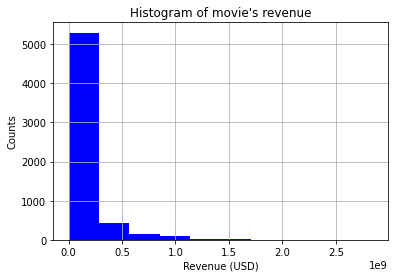

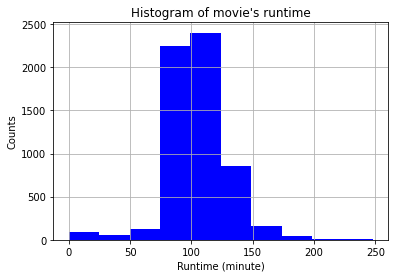

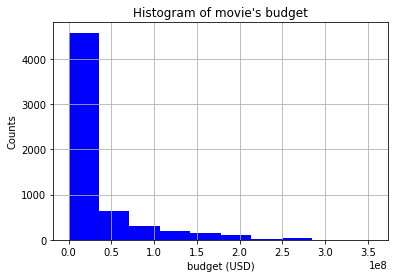

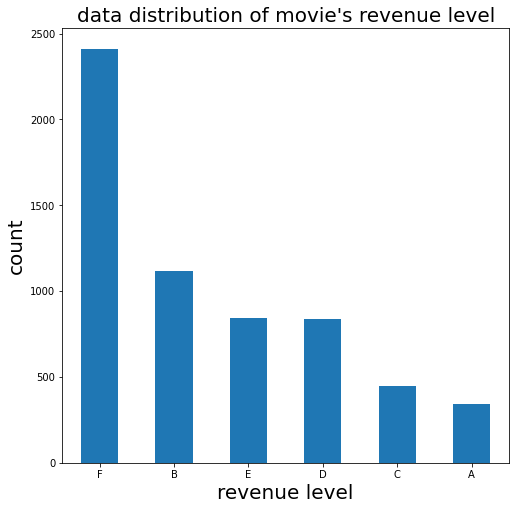

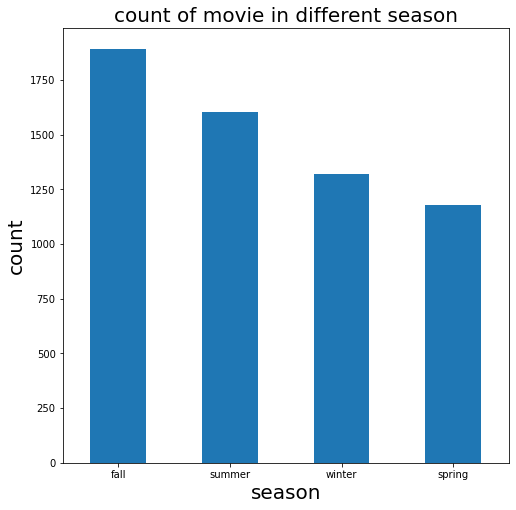

In [5]:
import pylab as pl
### visualization ###
### Revenue (numerical) ###
n, bins, patches = plt.hist(df['revenue'], 10, facecolor='b')
plt.xlabel('Revenue (USD)')
plt.ylabel('Counts')
plt.title("Histogram of movie's revenue")
plt.grid(True)
plt.show()
print("=" * 60)
### Runtime ###
n, bins, patches = plt.hist(df['runtime'], 10, facecolor='b')
plt.xlabel('Runtime (minute)')
plt.ylabel('Counts')
plt.title("Histogram of movie's runtime")
plt.grid(True)
plt.show()
print("=" * 60)
### Budget ###
n, bins, patches = plt.hist(df['budget'], 10, facecolor='b')
plt.xlabel('budget (USD)')
plt.ylabel('Counts')
plt.title("Histogram of movie's budget")
plt.grid(True)
plt.show()
print("=" * 60)
### Revenue (level) ###
fig2 = plt.figure(figsize = (8,8))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title("data distribution of movie's revenue level", fontsize = 20)
ax2.set_xlabel('revenue level', fontsize = 20)
ax2.set_ylabel('count', fontsize = 20)
df['Revenue_Level'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()
print("=" * 60)
### number of movie ###
fig2 = plt.figure(figsize = (8,8))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title('count of movie in different season', fontsize = 20)
ax2.set_xlabel('season', fontsize = 20)
ax2.set_ylabel('count', fontsize = 20)
df['season'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

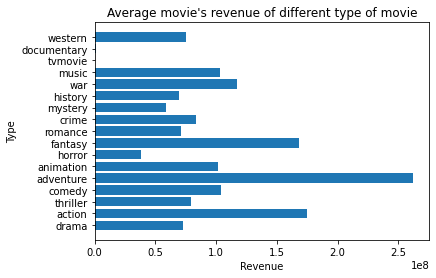

In [6]:
genre_dct = pd.Series(df['genre_name']).str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace(" ","").str.split(",")
total_genre = []
drama_r = 0
drama_c = 0
action_r = 0
action_c = 0
thriller_r = 0
thriller_c = 0
adventure_r = 0
adventure_c = 0
comedy_r = 0
comedy_c = 0
animation_r = 0
animation_c = 0
horror_r = 0
horror_c = 0
fantasy_r = 0
fantasy_c = 0
sciencefiction_r = 0
sciencefiction_c = 0
family_r = 0
family_c = 0
romance_r = 0
romance_c = 0            
crime_r = 0
crime_c = 0      
mystery_r = 0
mystery_c = 0          
history_r = 0
history_c = 0         
war_r = 0
war_c = 0                
music_r = 0
music_c = 0              
tvmovie_r = 0
tvmovie_c = 0             
documentary_r = 0
documentary_c = 0         
western_r = 0
western_c = 0             
for i,genres in enumerate(genre_dct):
  if 'drama' in genres:
    drama_r += df.iloc[i]['revenue']
    drama_c += 1
  if 'action' in genres:
    action_r += df.iloc[i]['revenue']
    action_c += 1
  if 'thriller' in genres:
    thriller_r += df.iloc[i]['revenue']
    thriller_c += 1
  if 'comedy' in genres:
    comedy_r += df.iloc[i]['revenue']
    comedy_c += 1
  if 'adventure' in genres:
    adventure_r += df.iloc[i]['revenue']
    adventure_c += 1
  if 'animation' in genres:
    animation_r += df.iloc[i]['revenue']
    animation_c += 1
  if 'horror' in genres:
    horror_r += df.iloc[i]['revenue']
    horror_c += 1
  if 'fantasy' in genres:
    fantasy_r += df.iloc[i]['revenue']
    fantasy_c += 1
  if 'sciencefiction' in genres:
    sciencefiction_r += df.iloc[i]['revenue']
    sciencefiction_c += 1
  if 'family' in genres:
    family_r += df.iloc[i]['revenue']
    family_c += 1
  if 'romance' in genres:
    romance_r += df.iloc[i]['revenue']
    romance_c += 1
  if 'crime' in genres:
    crime_r += df.iloc[i]['revenue']
    crime_c += 1
  if 'mystery' in genres:
    mystery_r += df.iloc[i]['revenue']
    mystery_c += 1
  if 'history' in genres:
    history_r += df.iloc[i]['revenue']
    history_c += 1
  if 'war' in genres:
    war_r += df.iloc[i]['revenue']
    war_c += 1
  if 'music' in genres:
    music_r += df.iloc[i]['revenue']
    music_c += 1
  if 'tvmovie' in genres:
    tvmovie_r += df.iloc[i]['revenue']
    tvmovie_c += 1
  if 'documentary' in genres:
    documentary_r += df.iloc[i]['revenue']
    documentary_c += 1
  if 'western' in genres:
    western_r += df.iloc[i]['revenue']
    western_c += 1
total_genre = ['drama','action','thriller','comedy','adventure','animation','horror','fantasy','romance','crime','mystery','history','war','music','tvmovie','documentary','western']

avg_revenue = [drama_r/drama_c,action_r/action_c,thriller_r/thriller_c,comedy_r/comedy_c,adventure_r/adventure_c,animation_r/animation_c,horror_r/horror_c,fantasy_r/fantasy_c,romance_r/romance_c,crime_r/crime_c,mystery_r/mystery_c,history_r/history_c,war_r/war_c,music_r/music_c,tvmovie_r,documentary_r/documentary_c,western_r/western_c]
plt.title("Average movie's revenue of different type of movie")
plt.barh(range(len(total_genre)),avg_revenue)
plt.xlabel('Revenue')
plt.ylabel('Type')
plt.yticks(range(len(total_genre)),total_genre)
plt.show()

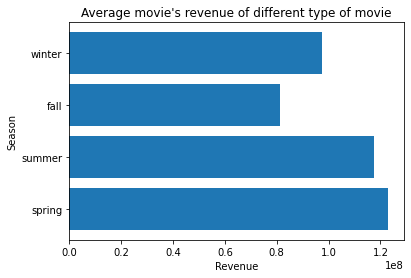

In [7]:
spring_r = 0
spring_c = 0
summer_r = 0
summer_c = 0
fall_r = 0
fall_c = 0
winter_r = 0
winter_c = 0
for i,seasons in enumerate(df['season']):
  if seasons == 'spring':
    spring_r += df.iloc[i]['revenue']
    spring_c += 1
  if seasons == 'summer':
    summer_r += df.iloc[i]['revenue']
    summer_c += 1
  if seasons == 'fall' :
    fall_r += df.iloc[i]['revenue']
    fall_c += 1
  if seasons == 'winter':
    winter_r += df.iloc[i]['revenue']
    winter_c += 1
total_season = ['spring','summer','fall','winter']
season_avg = [spring_r/spring_c,summer_r/summer_c,fall_r/fall_c,winter_r/winter_c]
plt.title("Average movie's revenue of different type of movie")
plt.barh(range(len(total_season)),season_avg)
plt.xlabel('Revenue')
plt.ylabel('Season')
plt.yticks(range(len(total_season)),total_season)
plt.show()


In [8]:
### generate final dataset ### 
dataset = df.drop(['TMDB_id', 'original_title', 'genre_ids', 'original_language', 'release_date', 'cast_id', 'company_id', 'season'], axis=1)
### Control length of cast name, company name, genre name for limit total of feature###
dct = pd.Series(df['cast_name']).str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.split(",")
cast_name = []
for movie in dct:
  cn = []
  count = 0
  for actress_name in movie:
    count += 1
    if count <= 3:
      cn.append(actress_name)
    else:
      continue
  cast_name.append(cn)
dataset["cast_name"] = cast_name
dct = pd.Series(df['company_name']).str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.split(",")
company_name = []
for movie in dct:
  cn = []
  count = 0
  for temp_name in movie:
    count += 1
    if count <= 2:
      cn.append(temp_name)
    else:
      continue
  company_name.append(cn)
dataset["company_name"] = company_name
dct = pd.Series(df['genre_name']).str.lower().str.replace("[","").str.replace("]","").str.replace("'","").str.replace(" ","").str.split(",")
genre_name = []
for movie in dct:
  count = 0
  cc = []
  for temp_name in movie:
    count += 1
    if count <= 3:
      cc.append(temp_name)
    else:
      continue
  genre_name.append(cc)
dataset["genre_name"] = genre_name
dataset.head()

,popularity,cast_name,cast_popularity,budget,runtime,company_name,revenue,Revenue_Level,original_language_label_encode,genre_name,season_label_encode
0,1069.261,"[andrew garfield, emma stone, jamie foxx]","[59.496, 20.223, 11.873, 11.457, 2.659, 10.92,...",200000000,142.0,"[marvel entertainment, columbia pictures]",708962323,A,6,"[action, adventure, fantasy]",1
1,881.486,"[tobey maguire, willem dafoe, kirsten dunst]","[38.197, 27.696, 22.164, 12.303, 3.864, 19.57,...",139000000,121.0,"[marvel enterprises, laura ziskin productions]",821708551,A,6,"[fantasy, action]",1
2,884.269,"[tobey maguire, kirsten dunst, james franco]","[38.197, 22.164, 12.303, 11.794, 4.404, 8.422,...",258000000,139.0,"[laura ziskin productions, marvel studios]",890871626,A,6,"[fantasy, action, adventure]",1
3,625.719,"[matthew mcconaughey, reese witherspoon, set...","[15.356, 14.74, 6.437, 42.053, 6.211, 6.032, 5...",75000000,108.0,"[illumination entertainment, universal pictures]",634151679,A,6,"[animation, comedy, family]",0
4,300.910,"[daniel radcliffe, rupert grint, emma watson]","[30.499, 19.278, 46.894, 11.044, 13.221, 19.54...",130000000,141.0,"[warner bros. pictures, 1492 pictures]",789804554,A,6,"[adventure, fantasy]",1


In [9]:
### performing one hot ###
genre_onehot = pd.Series(dataset['genre_name']).str.join('|').str.get_dummies()
company_onehot = pd.Series(dataset['company_name']).str.join('|').str.get_dummies()
cast_onehot = pd.Series(dataset['cast_name']).str.join('|').str.get_dummies()
dataset_onehot = pd.concat([dataset,genre_onehot,company_onehot,cast_onehot],axis = 1)
dataset_onehot = dataset_onehot.drop(['cast_name', 'company_name', 'genre_name', 'cast_popularity', 'revenue'], axis=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
X = dataset_onehot.drop(['Revenue_Level'], axis=1)
y = pd.DataFrame(revenue_sl)
kf = KFold(n_splits=3, shuffle = True)
rf = RandomForestClassifier(n_estimators=100,bootstrap = True)
conf_matrix_list_of_arrays = []
score_list = []
recall_list = []
precision_list = []

for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index].values
    y_train = y.iloc[train_index].values.ravel()
    X_test = X.iloc[test_index].values
    y_test = y.iloc[test_index].values.ravel()
    
    
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf,average = None)
    precision = precision_score(y_test, y_pred_rf,average = None)
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    
    score_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    conf_matrix_list_of_arrays.append(conf_matrix)

print("="*30)
print("six-level classification on RandomForest(n_estimators=100)")
print("="*30)

print("Confusion matrix:\n",np.mean(conf_matrix_list_of_arrays,axis = 0))

table = PrettyTable()
table.field_names = ["Revenue_Level","Accuracy Score","Sensitivity(Recall) Score","Precision Score"]
table.add_row(["A",np.mean(score_list),(recall_list[0][0] + recall_list[1][0] + recall_list[2][0]) / 3,(precision_list[0][0] + precision_list[1][0] + precision_list[2][0]) / 3])
table.add_row(["B",np.mean(score_list),(recall_list[0][1] + recall_list[1][1] + recall_list[2][1]) / 3,(precision_list[0][1] + precision_list[1][1] + precision_list[2][1]) / 3])
table.add_row(["C",np.mean(score_list),(recall_list[0][2] + recall_list[1][2] + recall_list[2][2]) / 3,(precision_list[0][2] + precision_list[1][2] + precision_list[2][2]) / 3])
table.add_row(["D",np.mean(score_list),(recall_list[0][3] + recall_list[1][3] + recall_list[2][3]) / 3,(precision_list[0][3] + precision_list[1][3] + precision_list[2][3]) / 3])
table.add_row(["E",np.mean(score_list),(recall_list[0][4] + recall_list[1][4] + recall_list[2][4]) / 3,(precision_list[0][4] + precision_list[1][4] + precision_list[2][4]) / 3])
table.add_row(["F",np.mean(score_list),(recall_list[0][5] + recall_list[1][5] + recall_list[2][5]) / 3,(precision_list[0][5] + precision_list[1][5] + precision_list[2][5]) / 3])

print(table)

six-level classification on RandomForest(n_estimators=100)
Confusion matrix:
 [[9.30000000e+01 1.83333333e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.33333333e+00]
 [4.00000000e+00 3.44333333e+02 1.00000000e+00 1.46666667e+01
  3.33333333e-01 7.66666667e+00]
 [0.00000000e+00 3.40000000e+01 7.70000000e+01 1.60000000e+01
  6.66666667e-01 2.23333333e+01]
 [0.00000000e+00 3.30000000e+01 6.66666667e-01 1.73000000e+02
  2.33333333e+00 7.06666667e+01]
 [0.00000000e+00 7.33333333e+00 3.33333333e-01 1.13333333e+01
  1.62666667e+02 9.90000000e+01]
 [3.33333333e-01 9.66666667e+00 0.00000000e+00 1.10000000e+01
  3.33333333e-01 7.82666667e+02]]
+---------------+--------------------+---------------------------+--------------------+
| Revenue_Level |   Accuracy Score   | Sensitivity(Recall) Score |  Precision Score   |
+---------------+--------------------+---------------------------+--------------------+
|       A       | 0.8163333333333332 |     0.8199154618189195    | 0.9565826330532213 |

In [11]:
from sklearn.tree import DecisionTreeClassifier
##### Decision Tree #####
dstree = DecisionTreeClassifier(class_weight="balanced")

conf_matrix_list_of_arrays = []
score_list = []
recall_list = []
precision_list = []

##### Binary Classification w/o PCA #####
kf = KFold(n_splits=3, shuffle = True)
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index].values
    y_train = y.iloc[train_index].values.ravel()
    X_test = X.iloc[test_index].values
    y_test = y.iloc[test_index].values.ravel()
    
    dstree.fit(X_train, y_train)
    y_pred_ds = dstree.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_ds)
    recall = recall_score(y_test, y_pred_ds, average = None)
    precision = precision_score(y_test, y_pred_ds, average = None)
    conf_matrix = confusion_matrix(y_test, y_pred_ds)
    
    score_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    conf_matrix_list_of_arrays.append(conf_matrix)

print("="*30)
print("six-level classification on Decision Tree")
print("="*30)

print("Confusion matrix:\n",np.mean(conf_matrix_list_of_arrays,axis = 0))

table = PrettyTable()
table.field_names = ["Revenue_Level","Accuracy Score","Sensitivity(Recall) Score","Precision Score"]
table.add_row(["A",np.mean(score_list),(recall_list[0][0] + recall_list[1][0] + recall_list[2][0]) / 3,(precision_list[0][0] + precision_list[1][0] + precision_list[2][0]) / 3])
table.add_row(["B",np.mean(score_list),(recall_list[0][1] + recall_list[1][1] + recall_list[2][1]) / 3,(precision_list[0][1] + precision_list[1][1] + precision_list[2][1]) / 3])
table.add_row(["C",np.mean(score_list),(recall_list[0][2] + recall_list[1][2] + recall_list[2][2]) / 3,(precision_list[0][2] + precision_list[1][2] + precision_list[2][2]) / 3])
table.add_row(["D",np.mean(score_list),(recall_list[0][3] + recall_list[1][3] + recall_list[2][3]) / 3,(precision_list[0][3] + precision_list[1][3] + precision_list[2][3]) / 3])
table.add_row(["E",np.mean(score_list),(recall_list[0][4] + recall_list[1][4] + recall_list[2][4]) / 3,(precision_list[0][4] + precision_list[1][4] + precision_list[2][4]) / 3])
table.add_row(["F",np.mean(score_list),(recall_list[0][5] + recall_list[1][5] + recall_list[2][5]) / 3,(precision_list[0][5] + precision_list[1][5] + precision_list[2][5]) / 3])

print(table)

six-level classification on Decision Tree
Confusion matrix:
 [[1.00333333e+02 1.13333333e+01 0.00000000e+00 3.33333333e-01
  1.00000000e+00 6.66666667e-01]
 [2.60000000e+01 2.98333333e+02 1.66666667e+01 2.13333333e+01
  3.66666667e+00 6.00000000e+00]
 [6.66666667e-01 2.30000000e+01 9.03333333e+01 1.86666667e+01
  8.66666667e+00 8.66666667e+00]
 [3.33333333e-01 1.86666667e+01 2.46666667e+01 1.87333333e+02
  2.66666667e+01 2.20000000e+01]
 [1.00000000e+00 4.33333333e+00 8.66666667e+00 2.33333333e+01
  1.95333333e+02 4.80000000e+01]
 [2.00000000e+00 1.26666667e+01 9.00000000e+00 3.30000000e+01
  6.60000000e+01 6.81333333e+02]]
+---------------+----------------+---------------------------+--------------------+
| Revenue_Level | Accuracy Score | Sensitivity(Recall) Score |  Precision Score   |
+---------------+----------------+---------------------------+--------------------+
|       A       |     0.7765     |     0.8820227173438182    | 0.7709890468872137 |
|       B       |     0.7765    

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
kf = KFold(n_splits=5)

best_score = 0
table = PrettyTable()
table.field_names = ["gamma","average_performance"]
for gamma in [0.01,1,100]:
    svmr = svm.SVC(kernel = "rbf",gamma = gamma)
    score_list = []
    for train_index , test_index in kf.split(X_train):
        X_train_k = X_train.iloc[train_index].values
        X_test_k = X_train.iloc[test_index].values
        y_train_k = y_train.iloc[train_index]
        y_test_k = y_train.iloc[test_index]
        
        svmr.fit(X_train_k,y_train_k)
        y_pred_svmr = svmr.predict(X_test_k)
        accuracy = accuracy_score(y_test_k, y_pred_svmr)
        score_list.append(accuracy)
    
    table.add_row([gamma,np.mean(score_list)])
    if np.mean(score_list) > best_score:
        best_score = np.mean(score_list)
        best_parametes = {'gamma':gamma}
print(table)
print("Best Score:{:.2f}".format(best_score))
print("Best Parameters:{}".format(best_parametes))

# svmr_f = svm.SVC(**best_parametes)
# svmr_f.fit(X_train,y_train)
# y_pred_svmr_f = svmr_f.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred_svmr_f)
# recall = recall_score(y_test,y_pred_svmr_f,average = None)
# precision = precision_score(y_test, y_pred_svmr_f,average = None)
# conf_matrix = confusion_matrix(y_test, y_pred_svmr_f)

# print("="*30)
# print("SVM w/ RBF kernel ")
# print("="*30)    

# print("Confusion matrix:\n",np.round(conf_matrix))
# table = PrettyTable()
# table.field_names = ["Class","Accuracy Score","Sensitivity(Recall) Score","Precision Score"]
# table.add_row(["b",accuracy,recall[0],precision[0]])
# table.add_row(["g",accuracy,recall[1],precision[1]])
# print(table)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

+-------+---------------------+
| gamma | average_performance |
+-------+---------------------+
|  0.01 |  0.6747619047619049 |
|   1   |  0.7011904761904761 |
|  100  |  0.7011904761904761 |
+-------+---------------------+
Best Score:0.70
Best Parameters:{'gamma': 1}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
svml = svm.SVC(kernel = 'linear')
svml.fit(X_train,y_train)
y_pred_svml = svml.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svml)
recall = recall_score(y_test, y_pred_svml,average = None)
precision = precision_score(y_test, y_pred_svml,average = None)
print("Confusion matrix:\n", confusion_matrix(y_test,y_pred_svml))
print("=" *30)
print("SVM using linear kernel")
print("=" *30)
table = PrettyTable()
table.field_names = ["class","Accuracy Score","Sensitivity(Recall) Score","Precision Score"]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
